In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

import warnings

## Import File

In [2]:
df = pd.read_csv('fetal_health.csv', index_col=0)

## EDA

In [3]:
df.head()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,,,,,,,,,,,,,,,,,,,,,
134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,0.0,150,50,200,5,3,76,107,107,170,0,3
134,0.001,0.0,0.013,0.008,0.0,0.003,29,6.3,0,0.0,150,50,200,6,3,71,107,106,215,0,3
122,0.000,0.0,0.000,0.000,0.0,0.000,83,0.5,6,15.6,68,62,130,0,0,122,122,123,3,1,3
122,0.000,0.0,0.002,0.000,0.0,0.000,84,0.5,5,13.6,68,62,130,0,0,122,122,123,3,1,3
122,0.000,0.0,0.003,0.000,0.0,0.000,86,0.3,6,10.6,68,62,130,1,0,122,122,123,1,1,3


In [4]:
df.dtypes

accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                             int64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability      int64
mean_value_of_long_term_variability                       float64
histogram_width                                             int64
histogram_min                                               int64
histogram_max                                               int64
histogram_number_of_peaks                                   int64
histogram_number_of_zeroes                                  int64
histogram_

In [5]:
df.isna().any()

accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes                                False
histogram_mode                          

In [6]:
df.columns

Index(['accelerations', 'fetal_movement', 'uterine_contractions',
       'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

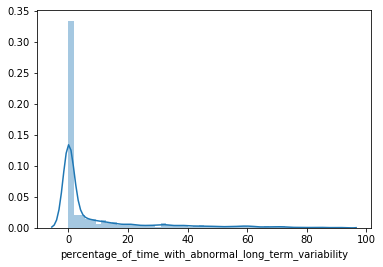

In [7]:
sns.distplot(df['percentage_of_time_with_abnormal_long_term_variability'])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000
mean_value_of_long_term_variability,2126.0,8.187629,5.628247,0.0,4.600,7.400,10.800,50.700


In [9]:
# df.hist(bins=50, figsize=(20,15))
# plt.show()

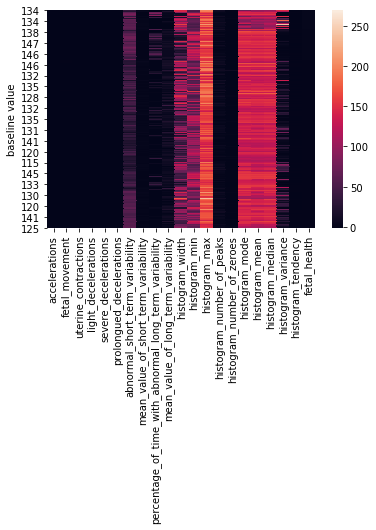

In [10]:
sns.heatmap(df)

In [11]:
df.columns

Index(['accelerations', 'fetal_movement', 'uterine_contractions',
       'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [12]:
# df.fetal_health_2 = df.fetal_health.apply(lambda x: 1 if x > 1 else 0)

In [13]:
# df.fetal_health_2.unique()

In [14]:
df.uterine_contractions

baseline value
134    0.010
134    0.013
122    0.000
122    0.002
122    0.003
       ...  
140    0.008
140    0.006
140    0.007
140    0.005
142    0.008
Name: uterine_contractions, Length: 2126, dtype: float64

In [15]:
# df['uterine_count_per_min'] = df.uterine_contractions * 60

In [16]:
# df['uterine_ten_min'] = df['uterine_count_per_min'] * 10

In [17]:
# df.uterine_ten_min.value_counts(ascending=False)

## Features and Target

In [19]:
X = df.drop(columns=['fetal_health'])
y = df.fetal_health

## Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1488, 20)
(638, 20)
(1488,)
(638,)


# BASELINE MODELS

## Logistic Regression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred_lr)))
# print('Recall: ' + str(metrics.recall_score(y_test, y_pred_lr)))
# print('Precision: ' + str(metrics.precision_score(y_test, y_pred_lr))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred_lr, average='weighted')))

Accuracy: 0.8605015673981191
F1 Score: 0.8462795416915531


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## KNN

In [22]:
# df_scalled = df.copy()

In [26]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df)
# scaler.transform(df)

In [24]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred_knn)))
# print('Recall: ' + str(metrics.recall_score(y_test, y_pred_knn)))
# print('Precision: ' + str(metrics.precision_score(y_test, y_pred_knn)))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred_knn,average='weighted')))


Accuracy: 0.8824451410658307
F1 Score: 0.8733026991843953


# IMPROVED MODELS

### Logistic Regression

In [ ]:
# Baseline Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred_lr = lr.predict(X_test)

# Baseline Model Evaluation
print("Accuracy: "+ str(metrics.accuracy_score(y_test,ypred_lr)))
print('Recall: '+ str(metrics.recall_score(y_test,ypred_lr)))
print('F1 Score: '+ str(metrics.f1_score(y_test,ypred_lr)))

In [ ]:
from imblearn.over_sampling import SMOTE

### KNN

In [27]:
# Baseline KNN Model

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
ypred_knn = knn.predict(X_test)

# Baseline Model Evaluation
print("Accuracy: "+ str(metrics.accuracy_score(y_test,ypred_knn)))
print('Recall: '+ str(metrics.recall_score(y_test,ypred_knn)))
print('F1 Score: '+ str(metrics.f1_score(y_test,ypred_knn)))

Accuracy: 0.8793103448275862
F1 Score: 0.872186591677992


### Decision Tree

In [29]:
# Baseline Decision Tree Model
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

# Baseline Model Evaluation
print("Accuracy: "+ str(metrics.accuracy_score(y_test,y_pred_tree)))
print('Recall: '+ str(metrics.recall_score(y_test,y_pred_tree)))
print('F1 Score: '+ str(metrics.f1_score(y_test,y_pred_tree)))

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [ ]:
# Baseline Random Forest Model
rfc = RandomForestClassifier(random_state =1, n_estimators= 50, max_depth = 3, n_jobs =-1,verbose=1)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)

# Baseline Model Evaluation
print("Accuracy: "+ str(metrics.accuracy_score(y_test,rfc_preds)))
print('Recall: '+ str(metrics.recall_score(y_test,rfc_preds)))
print('F1 Score: '+ str(metrics.f1_score(y_test,rfc_preds)))